# Identify Distribution outliers

It is one thing to identify outliers in a perticular distribution of data But when/
you have 100 distributions and whant to identify which distributions are diffrent from others how would you do it?

Typically you would look at quartile analysis, min max etc. But the case we are talking about is diffrent. Consider these 6 diffrent distributions. These are age distributions of women in a country.

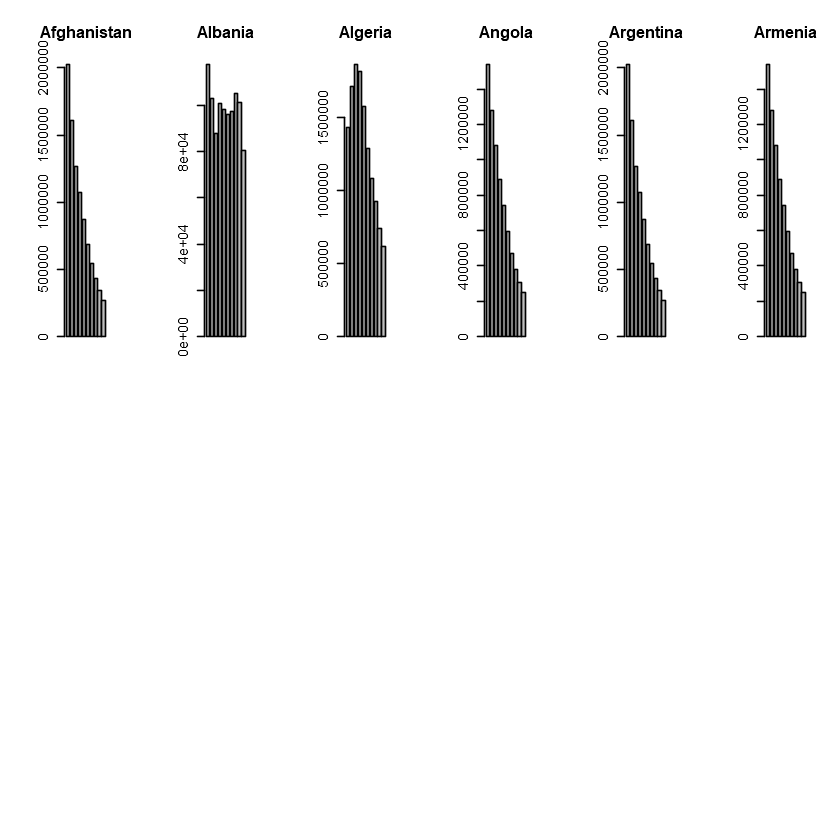

In [103]:
par(mfrow = c(2, 6))
barplot(as.numeric(data[1, c(5:14)]),main = 'Afghanistan')
barplot(as.numeric(data[2, c(5:14)]),main = 'Albania')
barplot(as.numeric(data[3, c(5:14)]),main = 'Algeria')
barplot(as.numeric(data[4, c(5:14)]),main = 'Angola')
barplot(as.numeric(data[1, c(5:14)]),main = 'Argentina')
barplot(as.numeric(data[4, c(5:14)]),main = 'Armenia')

You see that Angola distribution is distinctly diffrent from the rest. Visually this easy to pick up. however if there are many distributions and if you wanted to identify an outlier, how would you do it. This is the subject of our discussion here.

In [1]:
install.packages("rjson")


Installing package into 'C:/Users/Akshay/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [2]:
install.packages("data.table")

Installing package into 'C:/Users/Akshay/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [3]:
library(rjson) # instead of going through csv downloads and removeing additional rows I am using the data API

In [3]:
# Function to change the json file to data frame with required feilds

get_data <- function (url){
    data <- rjson::fromJSON(file = url)

    total_pop_date <- unlist(lapply(data[[2]],'[[', 'date'))
    # total_pop_value <- unlist(lapply(data[[2]],'[[', 'value'))
    values <- (lapply(data[[2]],'[[', 'value'))
    values[sapply(values, is.null)] <- NA
    total_pop_value <- unlist(values)
    total_pop_countryid <- unlist(lapply(lapply(data[[2]],'[[', 'country'),"[[","id"))
    total_pop_country <- unlist(lapply(lapply(data[[2]],'[[', 'country'),"[[","value"))

    return(data.frame(year = as.integer(total_pop_date), population = as.numeric(total_pop_value), country = as.character(total_pop_country),countryid = total_pop_countryid))
}

In [4]:
# Male 0-14 
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.0014.MA.IN?format=json&per_page=20000")
total_pop_MA_0_14 <- get_data(url)

In [5]:
summary(total_pop_MA_0_14)

      year        population                  country        countryid    
 Min.   :1960   Min.   :6.299e+03   Afghanistan   :   59   1A     :   59  
 1st Qu.:1974   1st Qu.:3.606e+05   Albania       :   59   1W     :   59  
 Median :1989   Median :1.327e+06   Algeria       :   59   4E     :   59  
 Mean   :1989   Mean   :3.795e+07   American Samoa:   59   7E     :   59  
 3rd Qu.:2004   3rd Qu.:7.983e+06   Andorra       :   59   8S     :   59  
 Max.   :2018   Max.   :1.012e+09   Angola        :   59   AD     :   59  
                NA's   :1486        (Other)       :15222   (Other):15222  

In [6]:
# Female 0-14 
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.0014.FE.IN?format=json&per_page=20000")
total_pop_FE_0_14 <- get_data(url)

In [7]:
summary(total_pop_FE_0_14)

      year        population                  country        countryid    
 Min.   :1960   Min.   :     6421   Afghanistan   :   59   1A     :   59  
 1st Qu.:1974   1st Qu.:   345686   Albania       :   59   1W     :   59  
 Median :1989   Median :  1292978   Algeria       :   59   4E     :   59  
 Mean   :1989   Mean   : 36033359   American Samoa:   59   7E     :   59  
 3rd Qu.:2004   3rd Qu.:  7730819   Andorra       :   59   8S     :   59  
 Max.   :2018   Max.   :946015496   Angola        :   59   AD     :   59  
                NA's   :1486        (Other)       :15222   (Other):15222  

In [8]:
# Female Total  # these are required since other numbers are in percentages 
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.TOTL.FE.IN?format=json&per_page=20000")
total_pop_FE <- get_data(url)


In [9]:
# Male Total  # these are required since other numbers are in percentages 
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.TOTL.MA.IN?format=json&per_page=20000")
total_pop_MA <- get_data(url)


In [10]:
total_pop_MA[total_pop_MA$country=="India" & total_pop_MA$year==2016,]# for validation only

,year,population,country,countryid
8027,2016,686467208,India,IN


In [11]:
total_pop_FE[total_pop_FE$country=="India" & total_pop_FE$year==2016,] # 637M + 687M ~ 1.3B numbers look palatable so is the M/F ratio

,year,population,country,countryid
8027,2016,638042381,India,IN


In [12]:
total_pop <- merge(x=total_pop_FE, y = total_pop_MA, by=c("year","country"))

colnames(total_pop)[colnames(total_pop)=="population.x"] = "female_pop"
colnames(total_pop)[colnames(total_pop)=="population.y"] = "male_pop"
total_pop$countryid.x <- NULL
total_pop$countryid.y <- NULL

total_pop$total_pop <- total_pop$female_pop+total_pop$male_pop

In [13]:
print(c(nrow(total_pop),nrow(total_pop_FE),nrow(total_pop_MA))) # same number of rows join was good

[1] 15576 15576 15576


In [15]:
# Male 15_19 # the values here are percentages of male population
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.1519.MA.5Y?format=json&per_page=20000")
total_pop_MA_15_19 <- get_data(url)

In [16]:
summary(total_pop_MA_15_19)

      year        population               country        countryid    
 Min.   :1960   Min.   : 2.525   Afghanistan   :   59   1A     :   59  
 1st Qu.:1974   1st Qu.: 8.588   Albania       :   59   1W     :   59  
 Median :1989   Median :10.052   Algeria       :   59   4E     :   59  
 Mean   :1989   Mean   : 9.613   American Samoa:   59   7E     :   59  
 3rd Qu.:2004   3rd Qu.:10.752   Andorra       :   59   8S     :   59  
 Max.   :2018   Max.   :16.384   Angola        :   59   AD     :   59  
                NA's   :1483     (Other)       :15222   (Other):15222  

In [17]:
# creating a function to get absolute values than percentages
get_absolute_values <- function(total_pop_MA_15_19){
  c_name <- gsub("total_pop_","",deparse(substitute(total_pop_MA_15_19)))
  colnames(total_pop_MA_15_19)[colnames(total_pop_MA_15_19)=="population"] <- c_name
  #total_pop_MA_15_19$countryid <- NULL
  
  total_pop <- merge(x=total_pop, y = total_pop_MA_15_19, by=c("year","country"))
  
  if(substr(c_name,1,2)=="MA"){
    total_pop$calc_pop <- total_pop[["male_pop"]]*(total_pop[[c_name]]/100)
  } else {
    total_pop$calc_pop <- total_pop[["female_pop"]]*(total_pop[[c_name]]/100)
  }
  
  results <- total_pop[,c("year","country","countryid","calc_pop")]
  colnames(results)[colnames(results)=="calc_pop"] <- c_name
  return(results)
}

In [18]:
total_pop_MA_15_19 <- get_absolute_values(total_pop_MA_15_19)

In [19]:
summary(total_pop_MA_15_19)

      year                country        countryid        MA_15_19        
 Min.   :1960   Afghanistan   :   59   1A     :   59   Min.   :     1572  
 1st Qu.:1974   Albania       :   59   1W     :   59   1st Qu.:    96231  
 Median :1989   Algeria       :   59   4E     :   59   Median :   364717  
 Mean   :1989   American Samoa:   59   7E     :   59   Mean   : 10940831  
 3rd Qu.:2004   Andorra       :   59   8S     :   59   3rd Qu.:  2329185  
 Max.   :2018   Angola        :   59   AD     :   59   Max.   :318861629  
                (Other)       :15222   (Other):15222   NA's   :1486       

In [20]:
# female 15_19 # the values here are percentages of male population
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.1519.FE.5Y?format=json&per_page=20000")
total_pop_FE_15_19 <- get_data(url)

In [21]:
total_pop_FE_15_19 <- get_absolute_values(total_pop_FE_15_19)

In [22]:
summary(total_pop_FE_15_19)

      year                country        countryid        FE_15_19        
 Min.   :1960   Afghanistan   :   59   1A     :   59   Min.   :     1497  
 1st Qu.:1974   Albania       :   59   1W     :   59   1st Qu.:    93016  
 Median :1989   Algeria       :   59   4E     :   59   Median :   359217  
 Mean   :1989   American Samoa:   59   7E     :   59   Mean   : 10450309  
 3rd Qu.:2004   Andorra       :   59   8S     :   59   3rd Qu.:  2276247  
 Max.   :2018   Angola        :   59   AD     :   59   Max.   :303066487  
                (Other)       :15222   (Other):15222   NA's   :1486       

In [23]:
# female 20-24
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.2024.FE.5Y?format=json&per_page=20000")
total_pop_FE_20_24 <- get_data(url)
total_pop_FE_20_24 <- get_absolute_values(total_pop_FE_20_24)

In [24]:
# female 25-29
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.2529.FE.5Y?format=json&per_page=20000")
total_pop_FE_25_29 <- get_data(url)
total_pop_FE_25_29 <- get_absolute_values(total_pop_FE_25_29)

In [25]:
# female 30-34
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.3034.FE.5Y?format=json&per_page=20000")
total_pop_FE_30_34 <- get_data(url)
total_pop_FE_30_34 <- get_absolute_values(total_pop_FE_30_34)

In [26]:
# female 35-39
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.3539.FE.5Y?format=json&per_page=20000")
total_pop_FE_35_39 <- get_data(url)
total_pop_FE_35_39 <- get_absolute_values(total_pop_FE_35_39)

In [27]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.4044.FE.5Y?format=json&per_page=20000")
total_pop_FE_40_44 <- get_data(url)
total_pop_FE_40_44 <- get_absolute_values(total_pop_FE_40_44)

In [28]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.4549.FE.5Y?format=json&per_page=20000")
total_pop_FE_45_49 <- get_data(url)
total_pop_FE_45_49 <- get_absolute_values(total_pop_FE_45_49)

In [29]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.5054.FE.5Y?format=json&per_page=20000")
total_pop_FE_50_54 <- get_data(url)
total_pop_FE_50_54 <- get_absolute_values(total_pop_FE_50_54)

In [30]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.5559.FE.5Y?format=json&per_page=20000")
total_pop_FE_55_59 <- get_data(url)
total_pop_FE_55_59 <- get_absolute_values(total_pop_FE_55_59)

In [31]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.6064.FE.5Y?format=json&per_page=20000")
total_pop_FE_60_64 <- get_data(url)
total_pop_FE_60_64 <- get_absolute_values(total_pop_FE_60_64)

In [32]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.2024.MA.5Y?format=json&per_page=20000")
total_pop_MA_20_24 <- get_data(url)

url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.2529.MA.5Y?format=json&per_page=20000")
total_pop_MA_25_29 <- get_data(url)

url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.3034.MA.5Y?format=json&per_page=20000")
total_pop_MA_30_34 <- get_data(url)

url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.3539.MA.5Y?format=json&per_page=20000")
total_pop_MA_35_39 <- get_data(url)

url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.4044.MA.5Y?format=json&per_page=20000")
total_pop_MA_40_44 <- get_data(url)

url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.4549.MA.5Y?format=json&per_page=20000")
total_pop_MA_45_49 <- get_data(url)

url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.5054.MA.5Y?format=json&per_page=20000")
total_pop_MA_50_54 <- get_data(url)

url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.5559.MA.5Y?format=json&per_page=20000")
total_pop_MA_55_59 <- get_data(url)

url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.6064.MA.5Y?format=json&per_page=20000")
total_pop_MA_60_64 <- get_data(url)

In [39]:
total_pop_MA_20_24 <- get_absolute_values(total_pop_MA_20_24)
total_pop_MA_25_29 <- get_absolute_values(total_pop_MA_25_29)
total_pop_MA_30_34 <- get_absolute_values(total_pop_MA_30_34)
total_pop_MA_35_39 <- get_absolute_values(total_pop_MA_35_39)
total_pop_MA_40_44 <- get_absolute_values(total_pop_MA_40_44)
total_pop_MA_45_49 <- get_absolute_values(total_pop_MA_45_49)
total_pop_MA_50_54 <- get_absolute_values(total_pop_MA_50_54)
total_pop_MA_55_59 <- get_absolute_values(total_pop_MA_55_59)
total_pop_MA_60_64 <- get_absolute_values(total_pop_MA_60_64)

In [40]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.65UP.MA.IN?format=json&per_page=20000")
total_pop_MA_65U <- get_data(url)
#total_pop_MA_65U <- get_absolute_values(total_pop_MA_65U)

In [41]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/SP.POP.65UP.FE.IN?format=json&per_page=20000")
total_pop_FE_65U <- get_data(url)
#total_pop_FE_65U <- get_absolute_values(total_pop_FE_65U)

In [42]:
colnames(total_pop_FE_0_14)[colnames(total_pop_FE_0_14)=="population"] <- "FE_0_14"
colnames(total_pop_MA_0_14)[colnames(total_pop_MA_0_14)=="population"] <- "MA_0_14"
colnames(total_pop_FE_65U)[colnames(total_pop_FE_65U)=="population"] <- "FE_65U"
colnames(total_pop_MA_65U)[colnames(total_pop_MA_65U)=="population"] <- "MA_65U"

In [43]:
consolidated_data <- Reduce(function(x, y) merge(x, y, by =c("year","country","countryid"),all=TRUE), list(total_pop_FE_0_14,
total_pop_FE_15_19,
total_pop_FE_20_24,
total_pop_FE_25_29,
total_pop_FE_30_34,
total_pop_FE_35_39,
total_pop_FE_40_44,
total_pop_FE_45_49,
total_pop_FE_50_54,
total_pop_FE_55_59,
total_pop_FE_60_64,
total_pop_MA_0_14,
total_pop_MA_15_19,
total_pop_MA_20_24,
total_pop_MA_25_29,
total_pop_MA_30_34,
total_pop_MA_35_39,
total_pop_MA_40_44,
total_pop_MA_45_49,
total_pop_MA_50_54,
total_pop_MA_55_59,
total_pop_MA_60_64,
total_pop_FE_65U,
total_pop_MA_65U))

In [44]:
nrow(consolidated_data) # we are good with joins

[1] 15576

In [45]:
consolidated_data <- merge(x = consolidated_data, y=total_pop, by =c("year","country"))

In [46]:
head(consolidated_data) # this is our consolidated data. on the surface there is nothing alarming about the data quality. the sums almost add up

year,country,countryid,FE_0_14,FE_15_19,FE_20_24,FE_25_29,FE_30_34,FE_35_39,FE_40_44,...,MA_40_44,MA_45_49,MA_50_54,MA_55_59,MA_60_64,FE_65U,MA_65U,female_pop,male_pop,total_pop
1960,Afghanistan,AF,1888809,447902.3,382568.8,325686.77,275420.3,231447.18,194060.57,...,10352082587,8517607528,6872759836,5687240035,4326972896,115763,136018,4347290,4649683,8996973
1960,Albania,AL,314300,71484.8,65742.1,53262.55,47086.2,40309.02,35319.56,...,310631034,280554991,238360576,183876762,166326296,47899,39146,780595,828205,1608800
1960,Algeria,DZ,2413454,520201.7,457152.9,392628.04,331455.8,257680.04,243343.94,...,12768303072,10767336259,10349832156,8265464073,7565070382,174847,181343,5493751,5564112,11057863
1960,American Samoa,AS,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1960,Andorra,AD,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1960,Angola,AO,1234187,248601.5,226422.0,204275.27,185359.1,159684.15,136260.52,...,3218774176,2671723768,2163523242,1657219082,1219184107,78837,59854,2803837,2651096,5454933


In [53]:
data <- consolidated_data[consolidated_data$year==2016,]

In [48]:
head(data)

,year,country,countryid,FE_0_14,FE_15_19,FE_20_24,FE_25_29,FE_30_34,FE_35_39,FE_40_44,...,MA_40_44,MA_45_49,MA_50_54,MA_55_59,MA_60_64,FE_65U,MA_65U,female_pop,male_pop,total_pop
14785,2016,Afghanistan,AF,7555798,2021942.6,1605362.1,1267619.76,1070214.2,869583.37,682314.11,...,139247816516,108960423877,85428868019,65635284866,49355839255,480921,418330,17143903,18239225,35383128
14786,2016,Albania,AL,245009,117529.8,102972.1,87776.54,100773.5,98143.43,96009.71,...,1265922579,1297067500,1473288948,1453819804,1153960726,191187,177916,1423809,1452292,2876101
14787,2016,Algeria,DZ,5760278,1433110.8,1715029.9,1861170.93,1815805.1,1578788.46,1286490.36,...,262905372180,220917129303,189212748127,155946339037,133348265657,1256137,1185396,20073099,20478305,40551404
14788,2016,American Samoa,AS,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
14789,2016,Andorra,AD,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
14790,2016,Angola,AO,6800494,1536114.0,1280160.6,1078090.33,889501.7,741114.41,593442.88,...,78736406960,61290350105,48933882399,38464691360,30490544052,379663,297990,14702852,14139632,28842484


In [104]:
data <- data[complete.cases(data),]

In [105]:
nrow(data)# we have complete data for 239 out of 264 countries / regions

[1] 239

In [106]:
library(data.table)

Warning message:
"package 'data.table' was built under R version 3.4.3"

In [107]:
data <- data.table(data)

In [108]:
class(data)

[1] "data.table" "data.frame"

In [109]:
data[,A014 := (FE_0_14 + MA_0_14)/total_pop ]

In [110]:
data[, A1519 := (FE_15_19 + MA_15_19)/total_pop ]
data[, A2024 := (FE_20_24 + MA_20_24)/total_pop ]
data[, A2529 := (FE_25_29 + MA_25_29)/total_pop ]
data[, A3034 := (FE_30_34 + MA_30_34)/total_pop ]
data[, A3539 := (FE_35_39 + MA_35_39)/total_pop ]
data[, A4044 := (FE_40_44 + MA_40_44)/total_pop ]
data[, A4549 := (FE_45_49 + MA_45_49)/total_pop ]
data[, A5054 := (FE_50_54 + MA_50_54)/total_pop ]
data[, A5559 := (FE_55_59 + MA_55_59)/total_pop ]
data[, A6064 := (FE_60_64 + MA_60_64)/total_pop ]
data[, A65U := (FE_65U + MA_65U)/total_pop ]

In [111]:
head(data)

year,country,countryid,FE_0_14,FE_15_19,FE_20_24,FE_25_29,FE_30_34,FE_35_39,FE_40_44,...,A2024,A2529,A3034,A3539,A4044,A4549,A5054,A5559,A6064,A65U
2016,Afghanistan,AF,7555798,2021942.599,1605362.143,1267619.757,1070214.202,869583.370,682314.109,...,8880.50342,7179.37271,6006.38102,4983.49853,3935.44909,3079.46113,2414.40781,1854.99795,1394.905167,0.02541468
2016,Albania,AL,245009,117529.751,102972.074,87776.540,100773.483,98143.430,96009.707,...,620.94390,575.94571,521.65204,456.75235,440.18572,451.01510,512.28874,505.51808,401.251970,0.12833451
2016,Algeria,DZ,5760278,1433110.776,1715029.869,1861170.933,1815805.067,1578788.465,1286490.358,...,8942.32658,9571.98960,9282.28887,8037.46330,6483.29362,5447.85612,4666.02027,3845.66410,3288.391264,0.06020835
2016,Angola,AO,6800494,1536114.010,1280160.574,1078090.334,889501.653,741114.406,593442.880,...,6000.99793,5023.57487,4126.25411,3429.45187,2729.89665,2125.01869,1696.60361,1333.62290,1057.148718,0.02349496
2016,Antigua and Barbuda,AG,11416,3990.258,4032.389,3775.859,3598.909,2984.735,3607.335,...,18.30716,16.43531,15.85832,13.20538,14.77108,18.22565,14.24773,10.95812,8.304505,0.06730352
2016,Arab World,1A,65482404,17666594.804,17104907.921,16708697.339,15474268.140,13486067.324,11200575.133,...,94866.73431,96514.40660,90773.53909,80364.45003,67319.33430,54957.02846,44837.47882,34733.29083,26122.060739,0.04404687


In [112]:
install.packages("plotly")

Installing package into 'C:/Users/Akshay/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [113]:
library(plotly)

Warning message:
"package 'plotly' was built under R version 3.4.3"Loading required package: ggplot2

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [114]:
m <- matrix(data[,c("A1519", # 014 is excluded from this since this is the largest pie for every country
"A2024",
"A2529",
"A3034",
"A3539",
"A4044",
"A4549",
"A5054",
"A5559",
"A6064")])
p <- plot_ly(
    x = data$country, y = c("A1519",
                            "A2024",
                            "A2529",
                            "A3034",
                            "A3539",
                            "A4044",
                            "A4549",
                            "A5054",
                            "A5559",
                            "A6064"),
    z = m, type = "heatmap"
)

In [115]:
p

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


The heatmap above shows some "hot spots"- These are middle-eastern countries Baharin, Quatar, Oman and United Arab Emirates they have 12 - 16% percentage of their poulation between 25 to 34 years. (Maldives also falls in this range) - Saudi Arabia is also not far with close to 20% of its pouplation falling under 30 -39

* Note 0-14 group is deliberately left out

In [116]:
install.packages("dtw", dependencies=TRUE, repos='http://cran.rstudio.com/')

Installing package into 'C:/Users/Akshay/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'dtw' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Akshay\AppData\Local\Temp\RtmpGORqIQ\downloaded_packages


In [56]:
install.packages("proxy")

Installing package into ‘/data/home/akadidal/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [117]:
library(dtw)

Warning message:
"package 'dtw' was built under R version 3.4.4"Loading required package: proxy
Warning message:
"package 'proxy' was built under R version 3.4.3"
Attaching package: 'proxy'

The following objects are masked from 'package:stats':

    as.dist, dist

The following object is masked from 'package:base':

    as.matrix

Loaded dtw v1.20-1. See ?dtw for help, citation("dtw") for use in publication.



In [118]:
sapply(data, function(x) sum(is.na(x))) # there are 25 columns that are NAs fully - 
       #removing these from dataset (they are not worth imputing since all values are NAs)

year    country  countryid    FE_0_14   FE_15_19   FE_20_24   FE_25_29 
         0          0          0          0          0          0          0 
  FE_30_34   FE_35_39   FE_40_44   FE_45_49   FE_50_54   FE_55_59   FE_60_64 
         0          0          0          0          0          0          0 
   MA_0_14   MA_15_19   MA_20_24   MA_25_29   MA_30_34   MA_35_39   MA_40_44 
         0          0          0          0          0          0          0 
  MA_45_49   MA_50_54   MA_55_59   MA_60_64     FE_65U     MA_65U female_pop 
         0          0          0          0          0          0          0 
  male_pop  total_pop       A014      A1519      A2024      A2529      A3034 
         0          0          0          0          0          0          0 
     A3539      A4044      A4549      A5054      A5559      A6064       A65U 
         0          0          0          0          0          0          0

In [119]:
data <- data[complete.cases(data)]

In [120]:
d <- dist(data[,c("A1519", # 014 is excluded from this since this is the largest pie for every country
"A2024",
"A2529",
"A3034",
"A3539",
"A4044",
"A4549",
"A5054",
"A5559",
"A6064")],method = "dtw")

In [121]:
head(d)

[1]  40256.360   9863.694   9802.003  39783.521 617662.376  13441.314

In [122]:
clust <- hclust(d)

In [123]:
install.packages("ggplot2")
library(ggplot2)

Installing package into 'C:/Users/Akshay/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


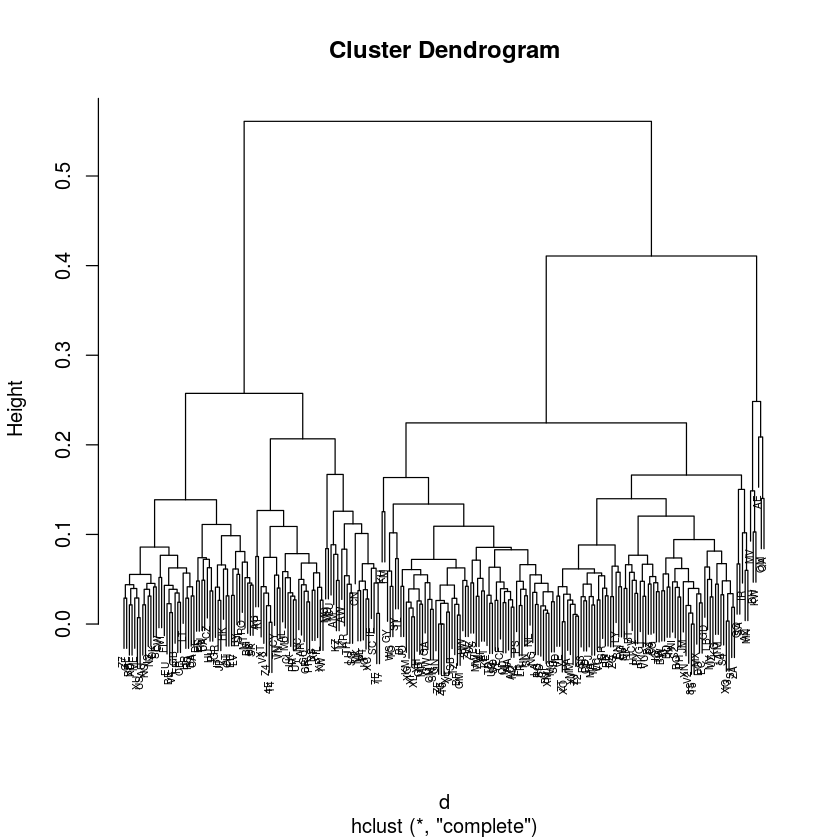

In [64]:
plot(clust, labels = data$countryid, cex=.5) # we can cut the tree at .3 height and the right most cluster looks like outlier.

In [65]:
clust_o <- cutree(clust, h = .3)

In [66]:
data$dist_outlier <-clust_o

In [67]:
data[data$dist_outlier == 3,] # same countries identified earlier using visual heatmap.

year,country,countryid,FE_0_14,FE_15_19,FE_20_24,FE_25_29,FE_30_34,FE_35_39,FE_40_44,⋯,A2529,A3034,A3539,A4044,A4549,A5054,A5559,A6064,A65U,dist_outlier
2016,Bahrain,BH,141602,36878.93,44910.92,56420.90,59824.89,50699.91,40085.93,⋯,0.12834793,0.1402026,0.10911237,0.08548506,0.06652245,0.04965573,0.03878336,0.02005932,0.02345192,3
2016,Kuwait,KW,410672,108909.06,113429.07,165780.10,208022.12,195180.11,172596.10,⋯,0.08712892,0.1200494,0.12419320,0.11050464,0.08920932,0.05640751,0.03956935,0.02244422,0.02194797,3
2016,Maldives,MV,48620,14309.08,18249.10,21357.12,19608.11,14190.08,11295.06,⋯,0.13555956,0.1229986,0.08218762,0.06255012,0.05188274,0.04262506,0.03287177,0.02021026,0.04100702,3
2016,Oman,OM,478415,116782.15,143746.19,183955.24,171578.22,128652.17,85289.11,⋯,0.15848260,0.1529383,0.10194865,0.07220306,0.04782319,0.03446313,0.02486894,0.01581352,0.02322995,3
2016,Qatar,QA,174058,38367.06,50308.08,77626.12,87275.14,69263.11,50612.08,⋯,0.16782427,0.1594419,0.12363253,0.09574554,0.06802939,0.04535020,0.02670090,0.01387111,0.01187989,3
2016,United Arab Emirates,AE,630622,168018.07,186410.07,273229.11,341784.14,311303.12,239554.09,⋯,0.13631447,0.1630712,0.14676097,0.12327746,0.08163019,0.05217479,0.02792145,0.01073832,0.01084177,3


In [68]:
install.packages("devtools")
library(devtools)

Installing package into ‘/data/home/akadidal/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [69]:
devtools::install_github("talegari/solitude")

from URL https://api.github.com/repos/talegari/solitude/zipball/master
Installing solitude
'/data/mlserver/9.3.0/runtime/R/bin/R' --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  '/tmp/RtmpuZVgTA/devtools609e7b551372/talegari-solitude-70b44b9'  \
  --library='/data/home/akadidal/R/x86_64-pc-linux-gnu-library/3.4'  \
  --install-tests 

Installation failed: Command failed (1)


In [70]:
devtools::install_github("Zelazny7/isofor")

Skipping install of 'isofor' from a github remote, the SHA1 (c9bb590d) has not changed since last install.
  Use `force = TRUE` to force installation


In [71]:
library(isofor)

In [72]:
mod = iForest(X = data[,c("A1519", # 014 is excluded from this since this is the largest pie for every country
"A2024",
"A2529",
"A3034",
"A3539",
"A4044",
"A4549",
"A5054",
"A5559",
"A6064")], 100, nrow(data)*.1) # requesting for 100 trees with 10% data sampled each time

In [73]:
p = predict(mod, data[,c("A1519", "A2024", "A2529", "A3034", "A3539", "A4044", "A4549", "A5054", "A5559", "A6064")])

In [74]:
data$iso_score <- p

In [75]:
data[data$iso_score >.6,] # same countries are outliers

year,country,countryid,FE_0_14,FE_15_19,FE_20_24,FE_25_29,FE_30_34,FE_35_39,FE_40_44,⋯,A3034,A3539,A4044,A4549,A5054,A5559,A6064,A65U,dist_outlier,iso_score
2016,Bahrain,BH,141602,36878.93,44910.92,56420.90,59824.89,50699.91,40085.93,⋯,0.1402026,0.1091124,0.08548506,0.06652245,0.04965573,0.03878336,0.02005932,0.02345192,3,0.6164761
2016,Kuwait,KW,410672,108909.06,113429.07,165780.10,208022.12,195180.11,172596.10,⋯,0.1200494,0.1241932,0.11050464,0.08920932,0.05640751,0.03956935,0.02244422,0.02194797,3,0.6205824
2016,Oman,OM,478415,116782.15,143746.19,183955.24,171578.22,128652.17,85289.11,⋯,0.1529383,0.1019486,0.07220306,0.04782319,0.03446313,0.02486894,0.01581352,0.02322995,3,0.6244116
2016,Qatar,QA,174058,38367.06,50308.08,77626.12,87275.14,69263.11,50612.08,⋯,0.1594419,0.1236325,0.09574554,0.06802939,0.04535020,0.02670090,0.01387111,0.01187989,3,0.6521689
2016,United Arab Emirates,AE,630622,168018.07,186410.07,273229.11,341784.14,311303.12,239554.09,⋯,0.1630712,0.1467610,0.12327746,0.08163019,0.05217479,0.02792145,0.01073832,0.01084177,3,0.6625006


## Qatar, United Arab Emirates, and Oman are serious aberrations. This may not be true women may not have been available for census. (This could be something with the data since the diffrence is not so apparent in the "Arab world")

In [77]:
# considering year 2016 for this analysis
data[,M_F_Diff := (female_pop - male_pop)/total_pop]

In [78]:
data[order(data$M_F_Diff)] # Qatar, United Arab Emirates, and Oman are serious aberrations 

year,country,countryid,FE_0_14,FE_15_19,FE_20_24,FE_25_29,FE_30_34,FE_35_39,FE_40_44,⋯,A3539,A4044,A4549,A5054,A5559,A6064,A65U,dist_outlier,iso_score,M_F_Diff
2016,Qatar,QA,174058,3.836706e+04,50308.08,7.762612e+04,8.727514e+04,6.926311e+04,50612.080,⋯,0.12363253,0.09574554,0.06802939,0.04535020,0.02670090,0.01387111,0.01187989,3,0.6521689,-0.50467740
2016,United Arab Emirates,AE,630622,1.680181e+05,186410.07,2.732291e+05,3.417841e+05,3.113031e+05,239554.095,⋯,0.14676097,0.12327746,0.08163019,0.05217479,0.02792145,0.01073832,0.01084177,3,0.6625006,-0.45522035
2016,Oman,OM,478415,1.167822e+05,143746.19,1.839552e+05,1.715782e+05,1.286522e+05,85289.111,⋯,0.10194865,0.07220306,0.04782319,0.03446313,0.02486894,0.01581352,0.02322995,3,0.6244116,-0.30788775
2016,Bahrain,BH,141602,3.687893e+04,44910.92,5.642090e+04,5.982489e+04,5.069991e+04,40085.926,⋯,0.10911237,0.08548506,0.06652245,0.04965573,0.03878336,0.02005932,0.02345192,3,0.6164761,-0.24259334
2016,Kuwait,KW,410672,1.089091e+05,113429.07,1.657801e+05,2.080221e+05,1.951801e+05,172596.100,⋯,0.12419320,0.11050464,0.08920932,0.05640751,0.03956935,0.02244422,0.02194797,3,0.6205824,-0.14857730
2016,Saudi Arabia,SA,4058105,1.142613e+06,1235031.91,1.307895e+06,1.304896e+06,1.319612e+06,1116071.920,⋯,0.10573646,0.09418693,0.06880981,0.05034449,0.03309246,0.02270904,0.03162981,1,0.5636538,-0.13748370
2016,Maldives,MV,48620,1.430908e+04,18249.10,2.135712e+04,1.960811e+04,1.419008e+04,11295.061,⋯,0.08218762,0.06255012,0.05188274,0.04262506,0.03287177,0.02021026,0.04100702,3,0.5754629,-0.13485258
2016,Equatorial Guinea,GQ,225133,5.114381e+04,48924.82,4.863682e+04,4.461484e+04,3.249688e+04,22973.916,⋯,0.06984474,0.04769401,0.03654374,0.02558177,0.01981097,0.01638484,0.02866335,1,0.5293701,-0.10543353
2016,Bhutan,BT,105731,3.705759e+04,38892.62,3.953863e+04,3.323553e+04,2.718644e+04,22103.355,⋯,0.07961612,0.06094869,0.05294245,0.03930916,0.03209264,0.02272257,0.04786372,1,0.5219890,-0.06234292
2016,Other small states,S4,4525656,1.292217e+06,1274446.66,1.241469e+06,1.129142e+06,9.389809e+05,767768.904,⋯,0.07169881,0.05800783,0.04749577,0.03980884,0.03285825,0.02607186,0.05274060,1,0.4681421,-0.05407882


In [79]:
sum(data$M_F_Diff > 0)

[1] 144

In [80]:
sum(data$M_F_Diff < 0)

[1] 95

In [81]:
# roughly there are more countries where there are more men than women.

##### As working population (25 and above) percentage increases the mobile adoption increases.
##### As precentages of age groups above 35 increases Fixed line adoption increases. Oder ages seem to have a greater afinity with fixed lines.

In [82]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/IT.CEL.SETS.P2?format=json&per_page=20000")
mobile_phone_adoption <- get_data(url)

In [84]:
nrow(mobile_phone_adoption)

[1] 15576

In [85]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/IT.MLT.MAIN.P2?format=json&per_page=20000")
Fixed_phone_adoption <- get_data(url)

In [86]:
url <- paste0("https://api.worldbank.org/v2/en/country/all/indicator/NY.GDP.PCAP.PP.CD?format=json&per_page=20000")
gdp <- get_data(url)

In [87]:
nrow(gdp)

[1] 15576

In [88]:
nrow(Fixed_phone_adoption)

[1] 15576

In [91]:
colnames(gdp)[colnames(gdp)=="population"] <- "GDP"
colnames(Fixed_phone_adoption)[colnames(Fixed_phone_adoption)=="population"] <- "FPA"
colnames(mobile_phone_adoption)[colnames(mobile_phone_adoption)=="population"] <- "MPA"

In [92]:
consolidated_data1 <- Reduce(function(x, y) merge(x, y, by =c("year","country","countryid"),all=TRUE), list(gdp,
Fixed_phone_adoption,
mobile_phone_adoption,
consolidated_data))

In [93]:
nrow(consolidated_data1)

[1] 15576

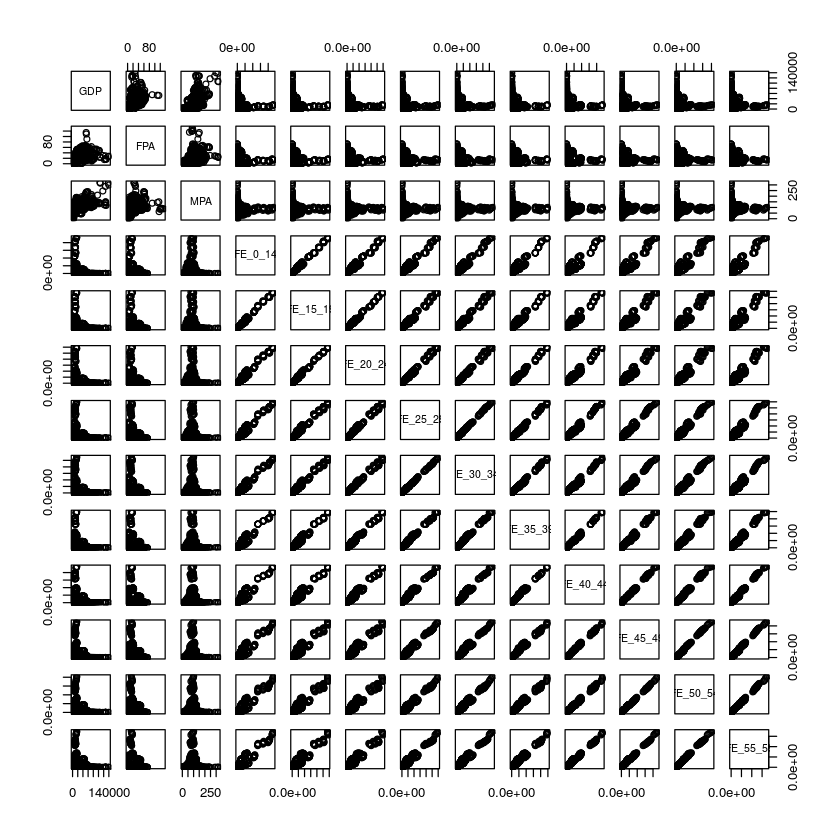

In [99]:
#consolidated_data1[consolidated_data1$year %in% c(2012,2013,2014,2015,2016),]
pairs(consolidated_data1[consolidated_data1$year %in% c(2010,2011,2012,2013,2014,2015,2016),c(4:16)]) 

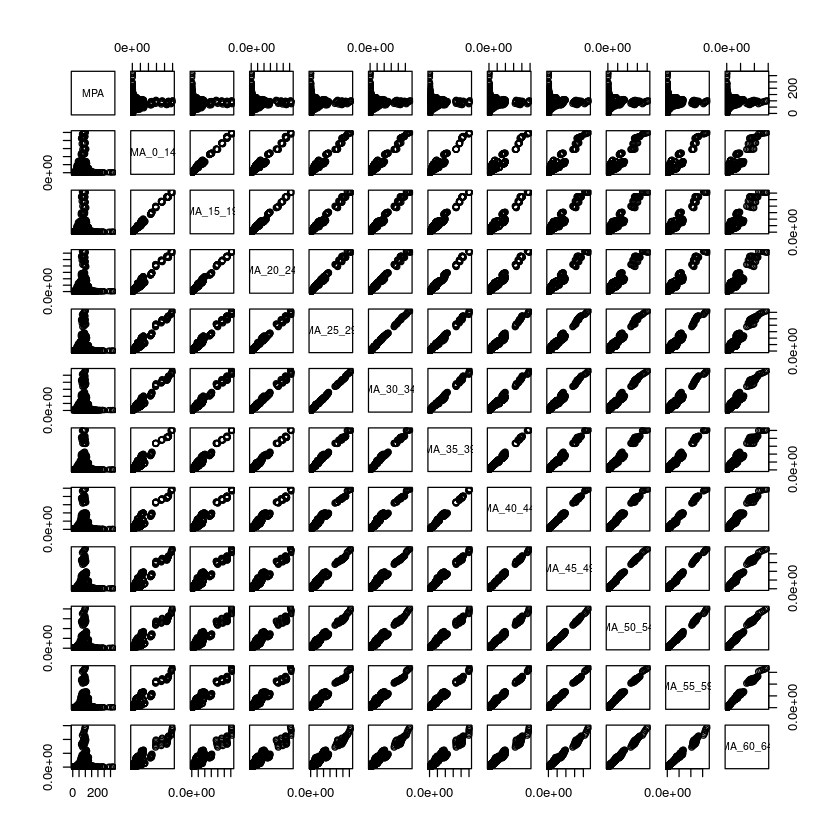

In [100]:
pairs(consolidated_data1[consolidated_data1$year %in% c(2010,2011,2012,2013,2014,2015,2016),c(6,18:28)])# male poulation 

In [134]:
rm(test_cor_m)

##### On the surface there seeems to be no corelation. The data is not corss sectional data. We'll test for corelation with 2016 data that we already have.

In [146]:
gdp_16 <- gdp[gdp$year == 2016,]
Fixed_phone_adoption_16 <- Fixed_phone_adoption[Fixed_phone_adoption$year == 2016,]
mobile_phone_adoption_16 <- mobile_phone_adoption[mobile_phone_adoption$year == 2016,]

In [147]:
data1 <- Reduce(function(x, y) merge(x, y, by =c("year","country","countryid"),all=TRUE), list(gdp_16,
Fixed_phone_adoption_16,
mobile_phone_adoption_16,
data))

In [152]:
nrow(mobile_phone_adoption_16)

[1] 264

In [154]:
data1 <- data1[complete.cases(data1),]

In [155]:
nrow(data1)

[1] 226

In [158]:
head(data1)

,year,country,countryid,GDP,FPA,MPA,FE_0_14,FE_15_19,FE_20_24,FE_25_29,⋯,A3539,A4044,A4549,A5054,A5559,A6064,A65U,dist_outlier,iso_score,M_F_Diff
1,2016,Afghanistan,AF,1934.617,0.3295011,62.33542,7400532,1980393.236,1572373.187,1241571.148,⋯,0.05189905,0.04086034,0.03224562,0.02546648,0.01992234,0.01524557,0.02541468,1,0.5232810,-0.030956054
2,2016,Albania,AL,11890.500,8.4965971,115.15226,245009,117529.751,102972.074,87776.540,⋯,0.06557188,0.06368932,0.06494447,0.07185275,0.07001257,0.05560416,0.12833451,2,0.4882658,-0.009903338
3,2016,Algeria,DZ,15013.296,8.3847329,115.84805,5768040,1435042.000,1717341.000,1863679.000,⋯,0.07818150,0.06338410,0.05335990,0.04559173,0.03701310,0.03127312,0.06020834,1,0.4825437,-0.009992451
6,2016,Angola,AO,6756.144,1.0567734,45.12170,6793651,1534568.373,1278872.478,1077005.560,⋯,0.04994923,0.03988186,0.03123778,0.02517287,0.02003653,0.01617611,0.02349495,1,0.5349866,0.019527434
7,2016,Antigua and Barbuda,AG,22611.285,22.2893535,178.28313,12193,4261.919,4306.918,4032.923,⋯,0.06061506,0.07063834,0.08658446,0.06734017,0.05047294,0.03746843,0.06730188,2,0.4921679,0.040163228
8,2016,Arab World,1A,16792.455,7.6292088,102.18036,65984435,17794278.051,17208681.723,16801040.612,⋯,0.07166660,0.05978314,0.04940013,0.04048795,0.03177916,0.02452515,0.04398749,1,0.4481229,-0.035523431


In [160]:
cor(data1[6],data1[-c(1,2,3,4,5,6)])

,FE_0_14,FE_15_19,FE_20_24,FE_25_29,FE_30_34,FE_35_39,FE_40_44,FE_45_49,FE_50_54,FE_55_59,⋯,A3539,A4044,A4549,A5054,A5559,A6064,A65U,dist_outlier,iso_score,M_F_Diff
MPA,-0.1182732,-0.1060239,-0.09424687,-0.08143463,-0.07696071,-0.07154249,-0.06179301,-0.05436486,-0.04875586,-0.04427959,⋯,0.5565182,0.6511148,0.6201731,0.6066962,0.5604122,0.4838766,0.4049589,0.5827721,0.195878,-0.1152937


In [161]:
max(cor(data1[6],data1[-c(1,2,3,4,5,6)]))

[1] 0.6511148

In [163]:
colnames(data1)

[1] "year"         "country"      "countryid"    "GDP"          "FPA"         
 [6] "MPA"          "FE_0_14"      "FE_15_19"     "FE_20_24"     "FE_25_29"    
[11] "FE_30_34"     "FE_35_39"     "FE_40_44"     "FE_45_49"     "FE_50_54"    
[16] "FE_55_59"     "FE_60_64"     "MA_0_14"      "MA_15_19"     "MA_20_24"    
[21] "MA_25_29"     "MA_30_34"     "MA_35_39"     "MA_40_44"     "MA_45_49"    
[26] "MA_50_54"     "MA_55_59"     "MA_60_64"     "FE_65U"       "MA_65U"      
[31] "female_pop"   "male_pop"     "total_pop"    "A014"         "A1519"       
[36] "A2024"        "A2529"        "A3034"        "A3539"        "A4044"       
[41] "A4549"        "A5054"        "A5559"        "A6064"        "A65U"        
[46] "dist_outlier" "iso_score"    "M_F_Diff"

In [165]:
cor(data1[6],data1[-c(1:33)])

,A014,A1519,A2024,A2529,A3034,A3539,A4044,A4549,A5054,A5559,A6064,A65U,dist_outlier,iso_score,M_F_Diff
MPA,-0.6470956,-0.6396378,-0.4354461,0.1232074,0.4048066,0.5565182,0.6511148,0.6201731,0.6066962,0.5604122,0.4838766,0.4049589,0.5827721,0.195878,-0.1152937


#### As working population (25 and above) percentage increases the mobile adoption increases.

In [166]:
cor(data1[5],data1[-c(1:33)])

,A014,A1519,A2024,A2529,A3034,A3539,A4044,A4549,A5054,A5559,A6064,A65U,dist_outlier,iso_score,M_F_Diff
FPA,-0.7846344,-0.7674569,-0.7308403,-0.343407,-0.02333304,0.3196744,0.593416,0.7119559,0.7860933,0.8004396,0.7800907,0.8166089,0.6407834,0.1931608,0.136149


###### as precentages of age groups above 35 increases Fixed line adoption increases. Oder ages seem to have a greater afinity with fixed lines.

###### Including Per capita GDP improves the ability to predict Mobile phone adoption. Regression is used to identify this. Rsqr and adjusted Rsqr both increase when GDP is added.
##### * Note that regression is performed only to answer the question. Proper step-wise regression, reducing variables, checking for all assumptions like multicolenearity etc. is not done here.

In [167]:
cor(data1[c(4:6)],data1[c(4:6)])

,GDP,FPA,MPA
GDP,1.0000000,0.6657665,0.5845948
FPA,0.6657665,1.0000000,0.4661319
MPA,0.5845948,0.4661319,1.0000000


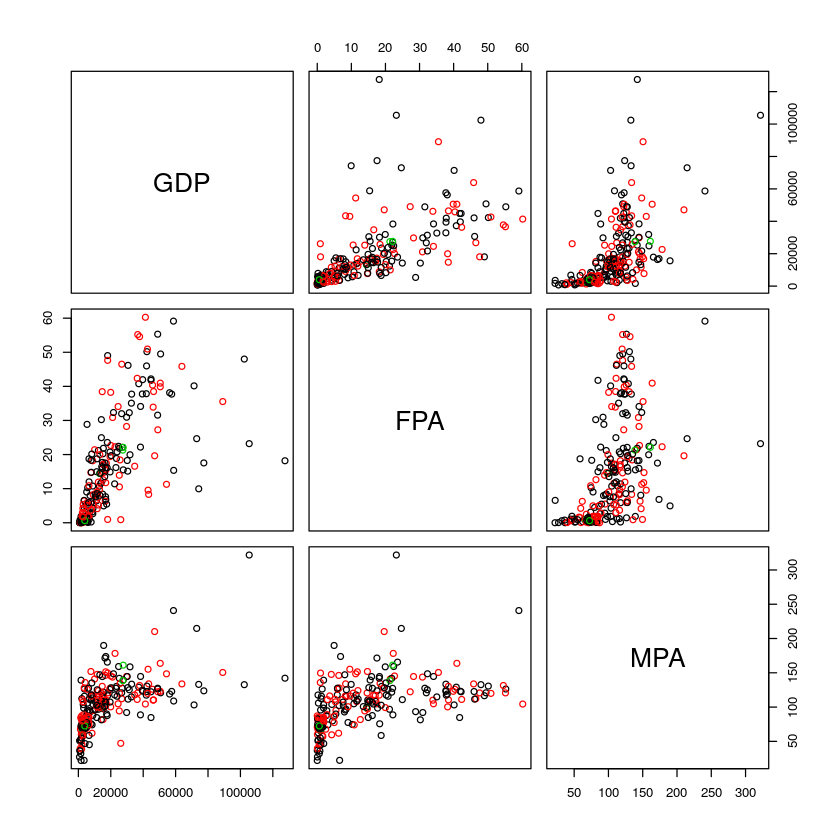

In [171]:
pairs(data1[c(4:6)], col = data$dist_outlier) # I was hoping to see the clusters having three diffrent curves

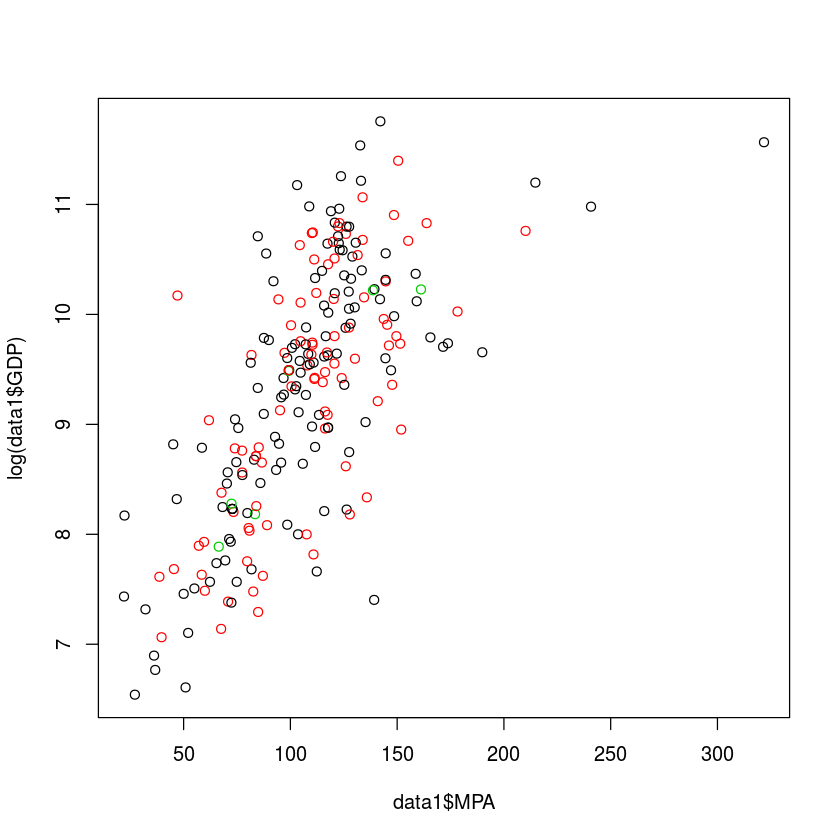

In [174]:
plot(data1$MPA, log(data1$GDP), col = data$dist_outlier) # attempting log transformation 

In [176]:
cor(data1$MPA, log(data1$GDP)) # has higher co-rel looks linear
cor(data1$MPA, (data1$GDP))

[1] 0.6825087

[1] 0.5845948

In [177]:
fit <- lm(MPA ~ A1519 + A2024+A2529+A3034+A3539+A4044+A4549+A5054+A5559+A6064, data = data1)

In [178]:
summary(fit)


Call:
lm(formula = MPA ~ A1519 + A2024 + A2529 + A3034 + A3539 + A4044 + 
    A4549 + A5054 + A5559 + A6064, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.006 -15.523  -2.484  11.159 138.188 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    50.17      42.97   1.168   0.2442  
A1519        -565.40     417.16  -1.355   0.1767  
A2024         330.50     517.38   0.639   0.5236  
A2529        -315.39     438.53  -0.719   0.4728  
A3034        1090.21     424.50   2.568   0.0109 *
A3539       -1151.95     568.12  -2.028   0.0438 *
A4044        1715.02     738.96   2.321   0.0212 *
A4549        -696.95     626.67  -1.112   0.2673  
A5054         -66.52     827.19  -0.080   0.9360  
A5559        1844.39     959.30   1.923   0.0558 .
A6064       -1267.88     561.42  -2.258   0.0249 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.86 on 215 degrees of freedom
Multiple R-squared:  0.5359,	A

In [180]:
fit1 <- lm(MPA ~ A1519 + A2024+A2529+A3034+A3539+A4044+A4549+A5054+A5559+A6064+GDP, data = data1)

In [181]:
summary(fit1)


Call:
lm(formula = MPA ~ A1519 + A2024 + A2529 + A3034 + A3539 + A4044 + 
    A4549 + A5054 + A5559 + A6064 + GDP, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.257 -15.489  -3.015  11.577 120.192 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.558e+01  4.394e+01   0.582   0.5611  
A1519       -2.997e+02  4.296e+02  -0.697   0.4863  
A2024        2.160e+02  5.150e+02   0.419   0.6754  
A2529       -1.267e+02  4.423e+02  -0.287   0.7747  
A3034        9.331e+02  4.262e+02   2.189   0.0297 *
A3539       -1.084e+03  5.636e+02  -1.923   0.0559 .
A4044        1.674e+03  7.322e+02   2.286   0.0232 *
A4549       -7.945e+02  6.223e+02  -1.277   0.2031  
A5054       -1.243e+01  8.197e+02  -0.015   0.9879  
A5559        1.771e+03  9.508e+02   1.863   0.0639 .
A6064       -1.082e+03  5.622e+02  -1.925   0.0555 .
GDP          2.885e-04  1.277e-04   2.260   0.0248 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resi

In [182]:
# adding GDP improve the predictibility of Mobile adoption both Rsqr and adjusted rsqr improved

In [184]:
fit2 <- lm(MPA ~ A1519 + A2024+A2529+A3034+A3539+A4044+A4549+A5054+A5559+A6064+log(GDP), data = data1)

In [185]:
summary(fit2)


Call:
lm(formula = MPA ~ A1519 + A2024 + A2529 + A3034 + A3539 + A4044 + 
    A4549 + A5054 + A5559 + A6064 + log(GDP), data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.993 -14.590  -3.465  11.431 128.552 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -55.229     49.617  -1.113 0.266911    
A1519         -60.304    424.251  -0.142 0.887101    
A2024        -129.612    514.766  -0.252 0.801447    
A2529          25.914    433.625   0.060 0.952401    
A3034         908.770    413.745   2.196 0.029134 *  
A3539       -1229.052    550.570  -2.232 0.026630 *  
A4044        1674.541    715.748   2.340 0.020227 *  
A4549        -993.496    611.662  -1.624 0.105793    
A5054         -39.394    801.148  -0.049 0.960828    
A5559        1881.206    929.113   2.025 0.044137 *  
A6064       -1273.744    543.730  -2.343 0.020068 *  
log(GDP)       11.672      2.992   3.901 0.000128 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘

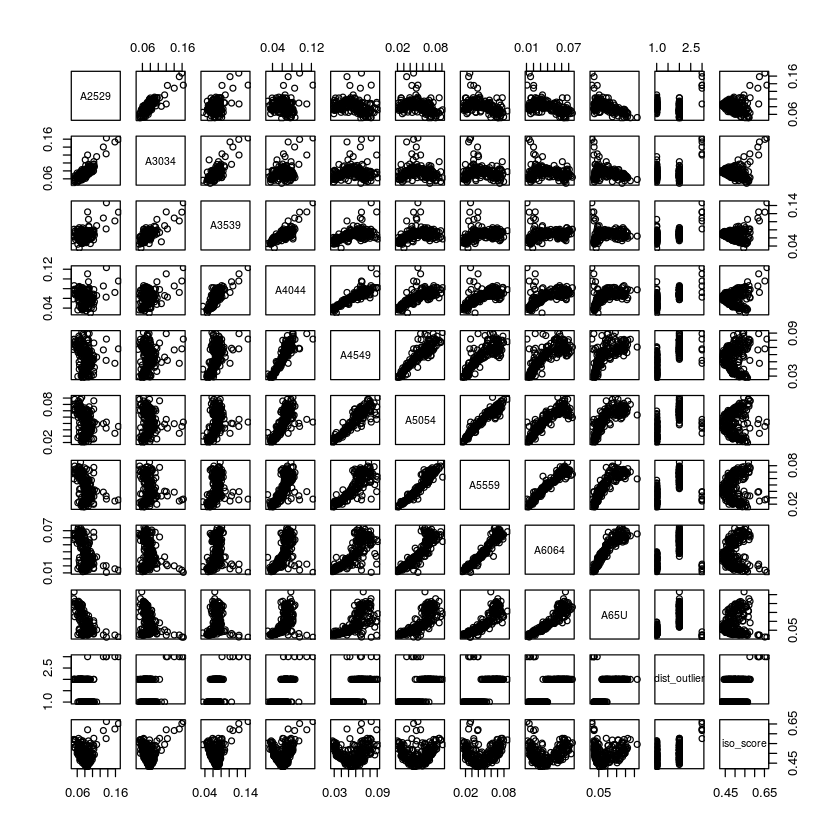

In [192]:
pairs(data[,c(34:44)]) # there is multicolinearity

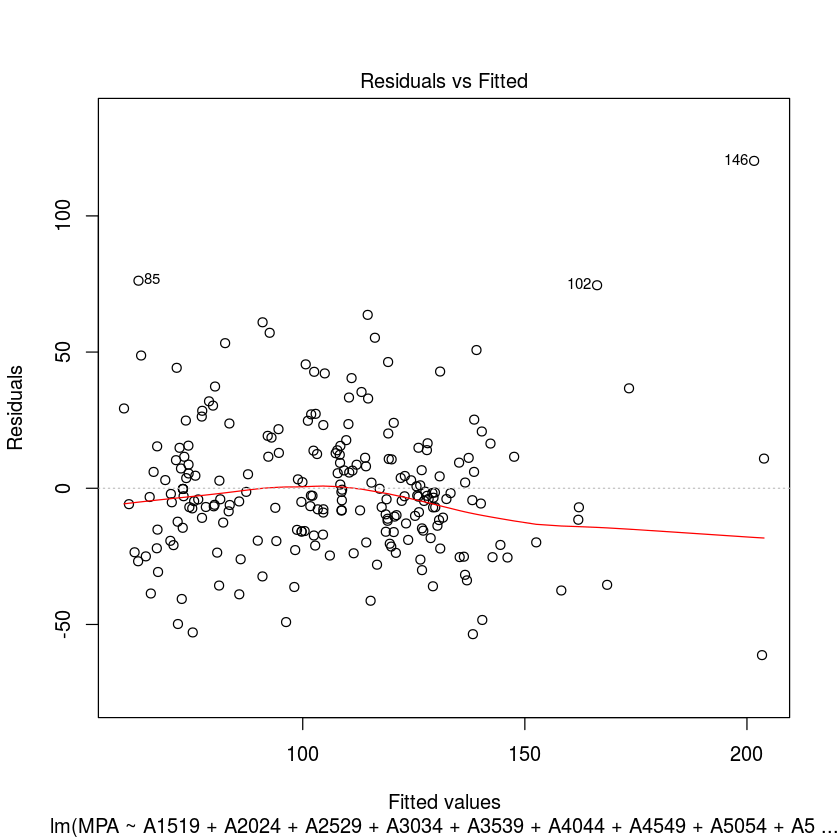

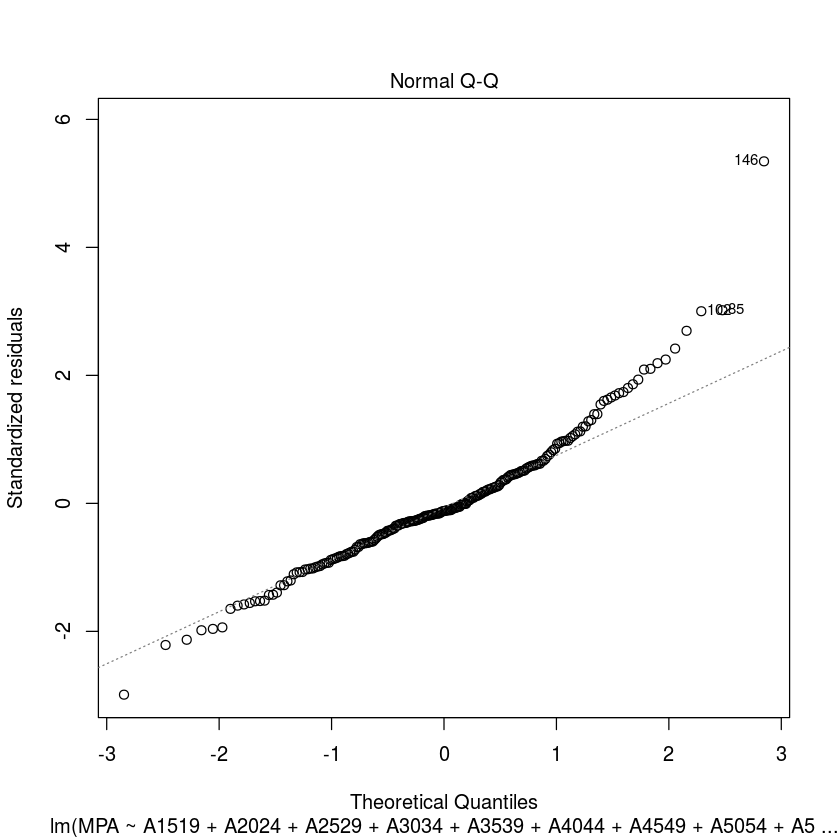

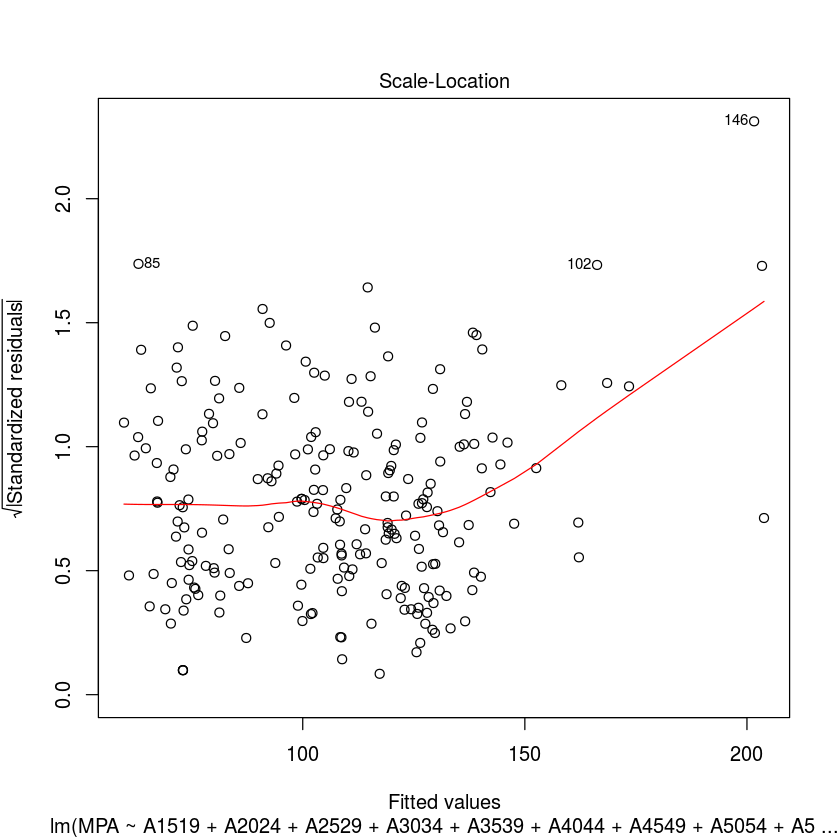

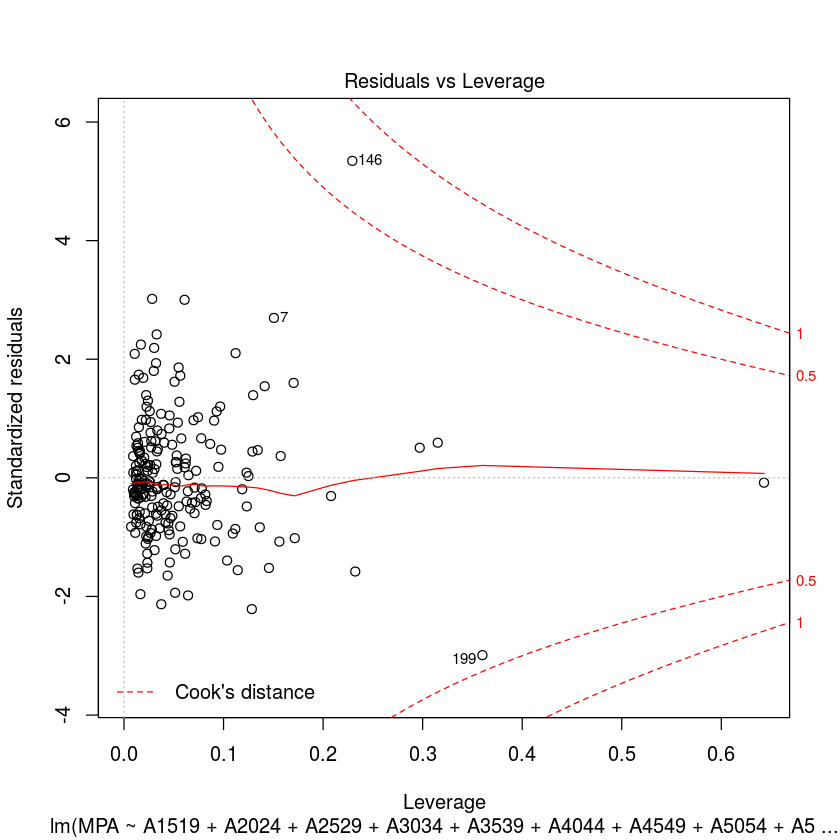

In [193]:
plot(fit) # there are leverage outliers